# Kernel Density Estimation
Let (x1, x2, …, xn) be a univariate independent and identically distributed sample drawn from some distribution with an unknown density ƒ. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is

$$
\widehat{f}_{h}(x)=\frac{1}{n} \sum_{i=1}^{n} K_{h}\left(x-x_{i}\right)=\frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x-x_{i}}{h}\right)
$$

where K is the kernel — a non-negative function — and h > 0 is a smoothing parameter called the bandwidth. A kernel with subscript h is called the scaled kernel and defined as Kh(x) = 1/h K(x/h). Intuitively one wants to choose h as small as the data will allow; however, there is always a trade-off between the bias of the estimator and its variance. The choice of bandwidth is discussed in more detail below.

Information source
$$
p(x) = \frac{1}{2} \mathcal N(x;0,1^2) + \frac{1}{2} \mathcal N(x;7,2^2)
$$
Estimated dist.
$$
\hat{p(x)} = \frac{1}{nh} \sum_{i=1}^n K(\frac{x-x_i}{h}),\  x_i \sim p(x)
$$
Kernel func.
$$
K(\mathbf{x)} = \mathcal N(\mathbf{x};0,1^2)
$$

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

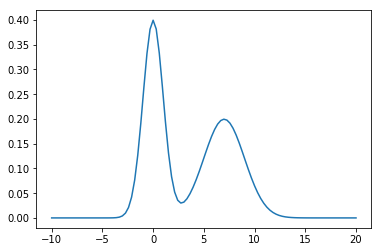

In [117]:
n_train = np.linspace(-10.0, 20.0, 100)
p_train = [norm.pdf(x=x, loc=0, scale=1)+norm.pdf(x=x, loc=7, scale=2) for x in n_train]
plt.plot(n_train,p_train)

In [118]:
train = np.concatenate((np.random.normal(0,1,50),np.random.normal(7,2,50)))
test = np.random.normal(0,1,50)+np.random.normal(7,2,50)

h: 0.1, log likelihood: -245.665
h: 0.5, log likelihood: -144.287
h: 1.0, log likelihood: -141.292
h: 2.0, log likelihood: -141.821
h: 4.0, log likelihood: -149.979
h: 8.0, log likelihood: -162.745


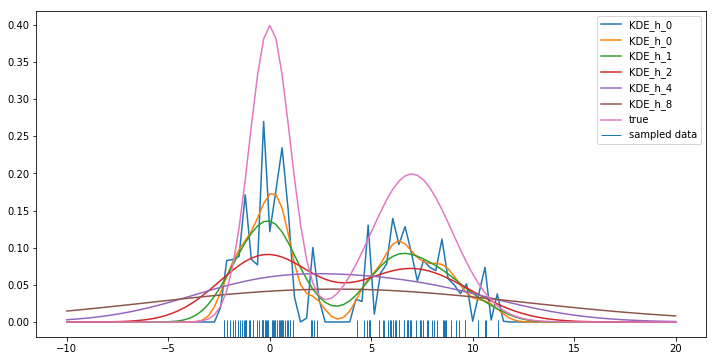

In [120]:
K = lambda x: np.exp(-np.dot(x,x)/2)/(2*np.pi)**(1/2)
#K = lambda x: norm.pdf(x=x, loc=0, scale=1)
p_hat = lambda x: np.sum([K((x-xi)/h) for xi in train])/(len(train)*h)
loglike = lambda X: np.sum([np.log(p_hat(x)) for x in X])
hs = [0.1, 0.5, 1,2,4,8]
plt.figure(figsize=(12,6))
for h in hs:
    p_pred = [p_hat(x) for x in n_train]
    plt.plot(n_train, p_pred, label="KDE_h_%d"%h)
    print("h: {:.1f}, log likelihood: {:.3f}".format(h,loglike(test)))
plt.plot(n_train,p_train, label="true")
sns.rugplot(train, label="sampled data")
plt.legend()